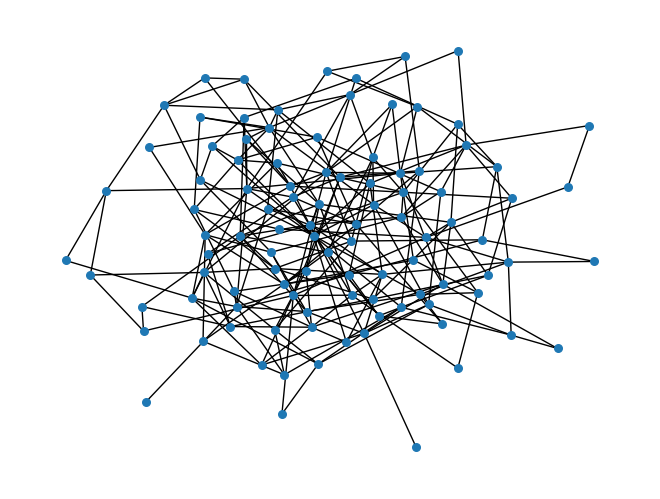

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
n = 100  # Number of nodes
p = 0.05  # Probability of edge creation

# Generate ER graph
G = nx.erdos_renyi_graph(n, p)

# Draw the graph
nx.draw(G, node_size=30, with_labels=False)
plt.show()


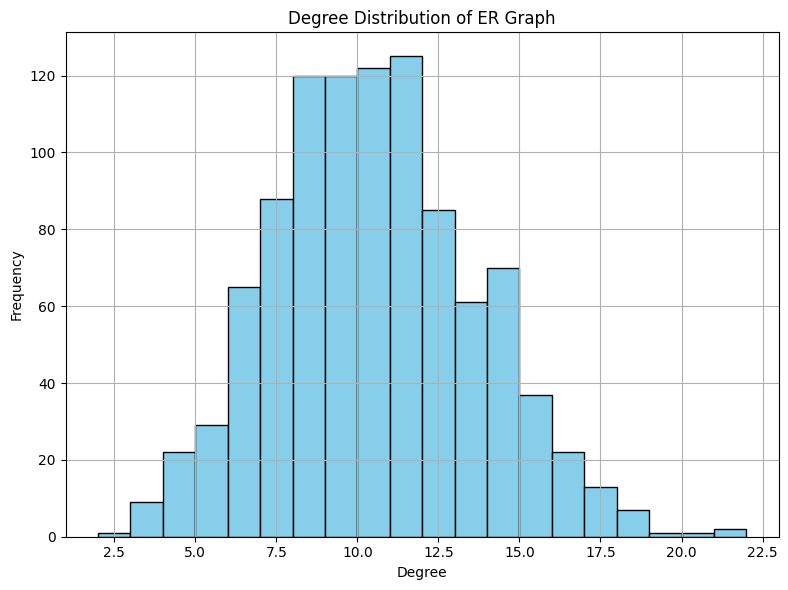

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate an ER graph
n = 1000  # number of nodes
p = 0.01  # probability of edge creation
G = nx.erdos_renyi_graph(n, p)

# Get degree sequence
degrees = [deg for _, deg in G.degree()]

# Plot degree distribution
plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees)+1), color='skyblue', edgecolor='black')
plt.title('Degree Distribution of ER Graph')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


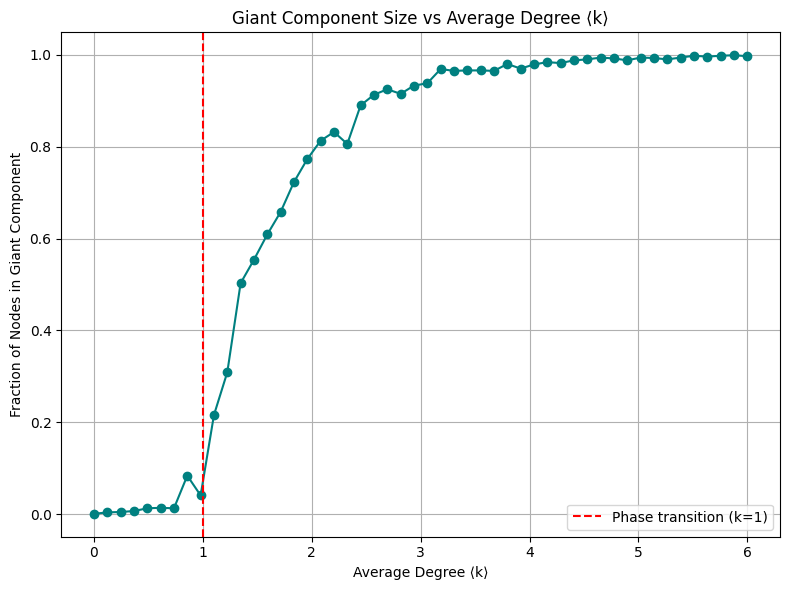

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Parameters
n = 1000  # number of nodes
avg_degrees = np.linspace(0, 6, 50)  # average degrees to test
giant_sizes = []

for k in avg_degrees:
    p = k / n  # convert average degree to ER p
    G = nx.erdos_renyi_graph(n, p)
    
    # Get the largest connected component
    if nx.is_connected(G):
        giant = G
    else:
        giant = max(nx.connected_components(G), key=len)
    
    giant_sizes.append(len(giant) / n)  # Normalize by n

# Plot
plt.figure(figsize=(8, 6))
plt.plot(avg_degrees, giant_sizes, marker='o', color='teal')
plt.axvline(x=1, color='red', linestyle='--', label='Phase transition (k=1)')
plt.title('Giant Component Size vs Average Degree ⟨k⟩')
plt.xlabel('Average Degree ⟨k⟩')
plt.ylabel('Fraction of Nodes in Giant Component')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


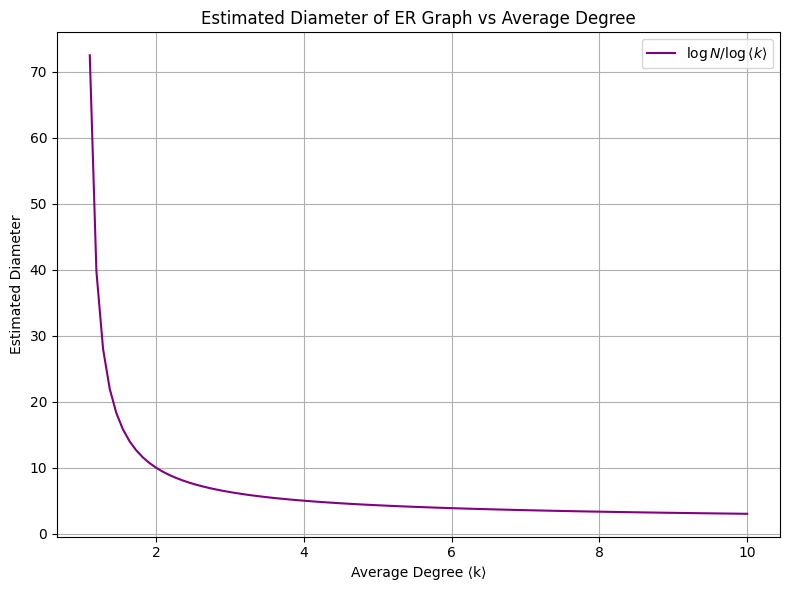

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 1000
avg_degrees = np.linspace(1.1, 10, 100)  # ⟨k⟩ must be > 1 to ensure connectedness
diameters = []

for k in avg_degrees:
    theoretical_diameter = np.log(n) / np.log(k)
    diameters.append(theoretical_diameter)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(avg_degrees, diameters, color='purple', label=r'$\log N / \log \langle k \rangle$')
plt.title('Estimated Diameter of ER Graph vs Average Degree')
plt.xlabel('Average Degree ⟨k⟩')
plt.ylabel('Estimated Diameter')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
import networkx as nx
import pandas as pd
import tqdm
HUMANNET_PATH = "../DATA/HumanNet-GSP.tsv"
HUMANNET = pd.read_csv(HUMANNET_PATH, sep="\t")
HUMANNET = HUMANNET[HUMANNET['Gene1'].notna()]
# Initialize a directed graph
G = nx.DiGraph()

# Add edges from DataFrame
for _, row in tqdm.tqdm(HUMANNET.iterrows(), total=len(HUMANNET), desc="Building Graph"):
    gene1 = row["Gene1"]
    gene2 = row["Gene2"]
    G.add_edge(gene1, gene2)


Building Graph: 100%|██████████| 260961/260961 [00:05<00:00, 50613.95it/s]


Estimated Diameter ≈ log(8779) / log(29.73) ≈ 2.68


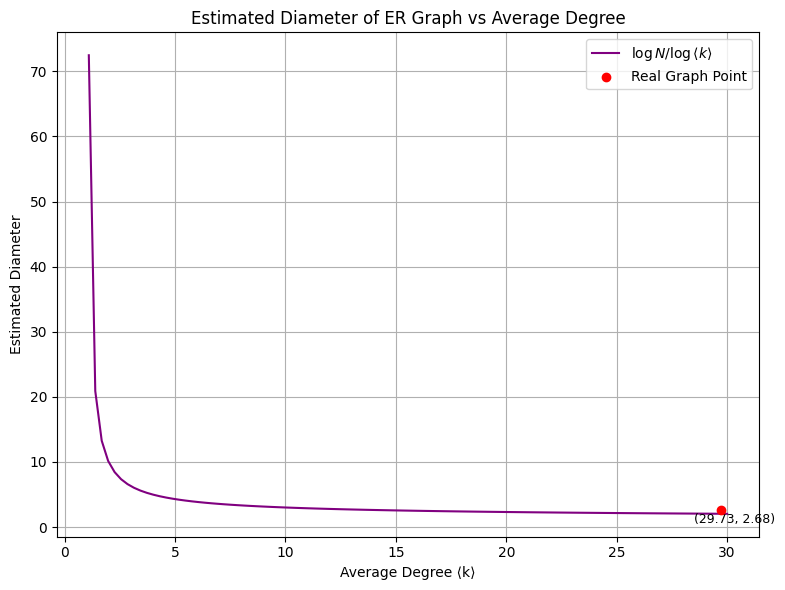

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Parameters
n = 1000
avg_degrees = np.linspace(1.1, 30, 100)  # ⟨k⟩ must be > 1 to ensure connectedness
diameters = []

for k in avg_degrees:
    theoretical_diameter = np.log(n) / np.log(k)
    diameters.append(theoretical_diameter)

# Number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Average in-degree and out-degree
avg_deg = num_edges / num_nodes

# Estimated diameter
estimated_diameter = np.log(num_nodes) / np.log(avg_deg)
print(f"Estimated Diameter ≈ log({num_nodes}) / log({avg_deg:.2f}) ≈ {estimated_diameter:.2f}")

# Plot
plt.figure(figsize=(8, 6))
plt.plot(avg_degrees, diameters, color='purple', label=r'$\log N / \log \langle k \rangle$')

# Plot the real graph's point
plt.scatter(avg_deg, estimated_diameter, color='red', zorder=5, label='Real Graph Point')
plt.annotate(f"({avg_deg:.2f}, {estimated_diameter:.2f})",
             (avg_deg, estimated_diameter),
             textcoords="offset points", xytext=(10, -10), ha='center', fontsize=9)

plt.title('Estimated Diameter of ER Graph vs Average Degree')
plt.xlabel('Average Degree ⟨k⟩')
plt.ylabel('Estimated Diameter')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


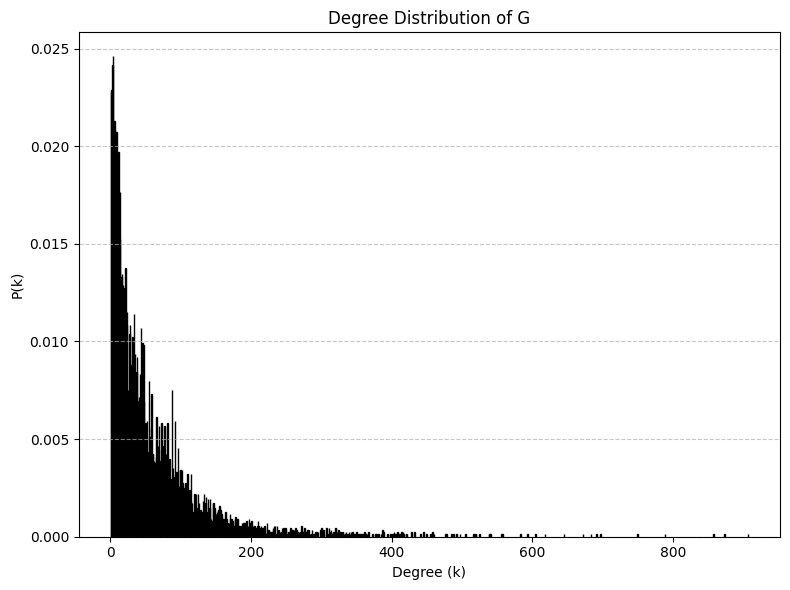

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Get degrees of all nodes
degrees = [deg for _, deg in G.degree()]

# Count frequency of each degree
degree_counts = Counter(degrees)

# Sort degrees
deg, count = zip(*sorted(degree_counts.items()))

# Normalize to get probability
total_nodes = G.number_of_nodes()
probabilities = [c / total_nodes for c in count]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(deg, probabilities, color='skyblue', edgecolor='black')
plt.title('Degree Distribution of G')
plt.xlabel('Degree (k)')
plt.ylabel('P(k)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
